## Conolutional Neural Network

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data() 

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"] #classes are stored in list
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''  #0,1,2,.. are labels/classes

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

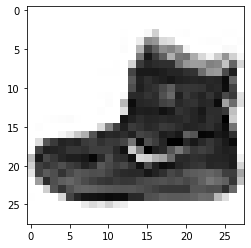

In [ ]:
#to show images
plt.imshow(X_train[0],cmap='Greys',) #to convert numbers into pixels

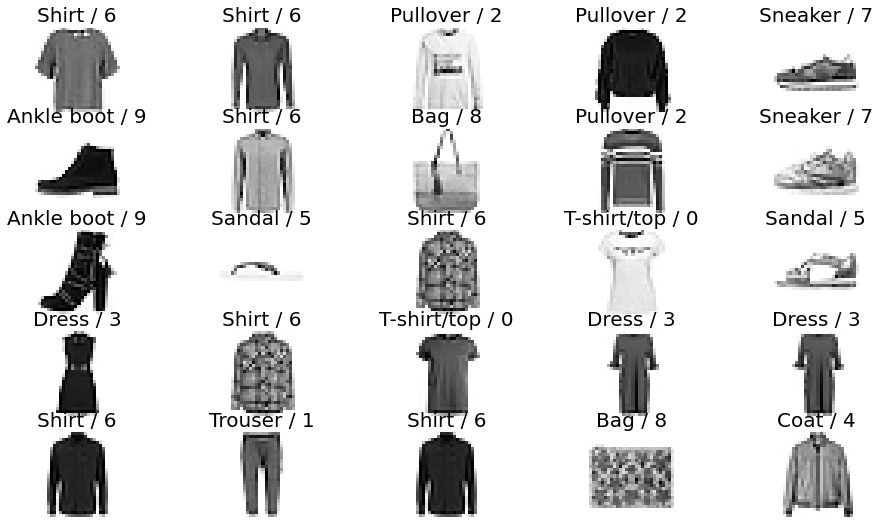

In [ ]:
#to show all images
plt.figure(figsize=(16,9))
j=1
for i in np.random.randint(0,100,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]),fontsize=20)

In [ ]:
#Convolution Neural Network takes data in a form of 4d

## Change Dimension

In [ ]:
X_train.ndim

3

In [ ]:
X_train=np.expand_dims(X_train,-1) #-1 is to give axis in which direction to change dimension
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train.shape

(60000, 28, 28, 1)

## Feature Scaling

In [ ]:
#to convert data in b/w 0 nd 1
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
#to train convolutional Neural Network, we training and validation data. When we are training data we need to test data continuously, for this we need validation dataset
#after fully training cnn, we will use test data for testing

## Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=52) #we need 20 percent validation data
print('Shape of X_train= ',X_train.shape)
print('Shape of y_train= ',y_train.shape)
print('Shape of X_test= ',X_val.shape)
print('Shape of y_test= ',y_val.shape)

Shape of X_train=  (48000, 28, 28, 1)
Shape of y_train=  (48000,)
Shape of X_test=  (12000, 28, 28, 1)
Shape of y_test=  (12000,)


## Convolutional Neural Network - Model Building

In [ ]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]), #input_shape is of single channel(means black nd white)
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'), #to build neural network
                         keras.layers.Dense(units=10,activation='softmax')

])

In [ ]:
#to know about summary of our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile mode
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #loss is error

In [ ]:
#to train model
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val)) #we have taken 512 images,epochs is to how many times train the model to increase its accuracy

Epoch 1/10
94/94 [==============================] - 17s 174ms/step - loss: 0.9421 - accuracy: 0.6910 - val_loss: 0.4107 - val_accuracy: 0.8569
Epoch 2/10
94/94 [==============================] - 16s 173ms/step - loss: 0.3929 - accuracy: 0.8629 - val_loss: 0.3498 - val_accuracy: 0.8770
Epoch 3/10
94/94 [==============================] - 16s 173ms/step - loss: 0.3383 - accuracy: 0.8838 - val_loss: 0.3340 - val_accuracy: 0.8842
Epoch 4/10
94/94 [==============================] - 16s 174ms/step - loss: 0.3092 - accuracy: 0.8922 - val_loss: 0.3139 - val_accuracy: 0.8911
Epoch 5/10
94/94 [==============================] - 16s 173ms/step - loss: 0.2845 - accuracy: 0.8991 - val_loss: 0.3064 - val_accuracy: 0.8910
Epoch 6/10
94/94 [==============================] - 16s 174ms/step - loss: 0.2711 - accuracy: 0.9044 - val_loss: 0.2830 - val_accuracy: 0.9006
Epoch 7/10
94/94 [==============================] - 16s 175ms/step - loss: 0.2506 - accuracy: 0.9126 - val_loss: 0.2796 - val_accuracy: 0.9013

## Test the Model

In [ ]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2) #test the model giving index of image, give data in 4 dimensions

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [ ]:
#to cross-check
y_test[0]

9

In [ ]:
y_predict=model.predict(X_test).round(2)
y_predict

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.1 , 0.01, 0.01]], dtype=float32)

In [ ]:
#to evaluate
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2847 - accuracy: 0.8975


[0.2846783995628357, 0.8974999785423279]

## Visualize Output

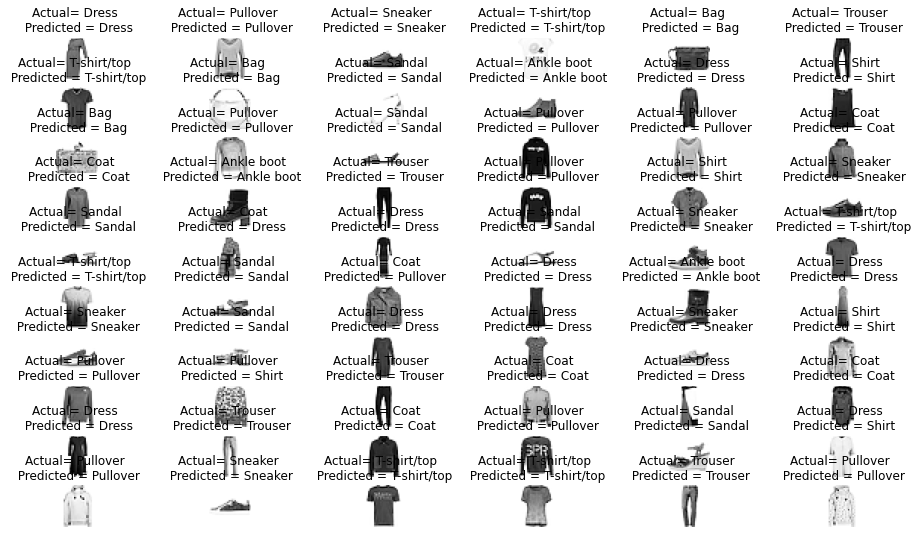

In [ ]:
#to show all images
plt.figure(figsize=(16,9))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual= {} \n Predicted = {}'.format(class_labels[y_test[i]],class_labels[np.argmax(y_predict[i])],fontsize=20))

# Confusion Matrix

In [ ]:
#for evaluation, we use confusion matrix when we have classification problem
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,[np.argmax(i) for i in y_predict])

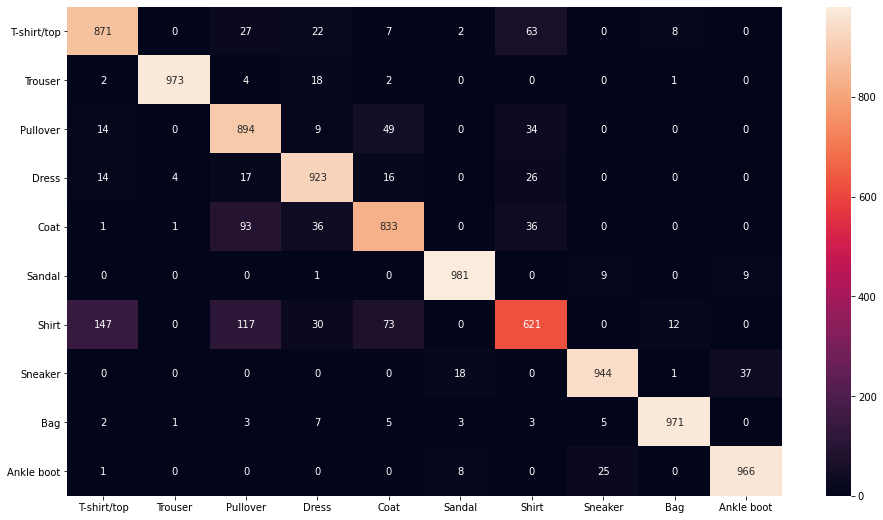

In [ ]:
#to plot this using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels= class_labels)

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,[np.argmax(i) for i in y_predict],target_names=class_labels)

In [ ]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.89      0.83      1000
       Dress       0.88      0.92      0.90      1000
        Coat       0.85      0.83      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.79      0.62      0.70      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Save and Load Model

In [ ]:
model.save('MNIST_classifier_cnn_model.h5')

In [ ]:
#to load model
model=keras.models.load_model('MNIST_classifier_cnn_model.h5')

In [ ]:
#to use it to predict
model.predict(X_test)

array([[3.71201304e-06, 1.09841906e-07, 5.48394428e-06, ...,
        1.03472462e-02, 6.86778512e-04, 9.83557582e-01],
       [2.83589907e-06, 3.06050207e-09, 9.99854922e-01, ...,
        1.20670948e-14, 2.22945147e-08, 1.62442000e-12],
       [2.09503014e-06, 9.99993682e-01, 2.60066653e-08, ...,
        6.39023001e-11, 4.54382985e-08, 1.73411736e-11],
       ...,
       [1.19691540e-03, 2.55279069e-08, 6.67371554e-04, ...,
        3.33047365e-06, 9.90675032e-01, 1.61283026e-07],
       [3.80841129e-07, 9.99937296e-01, 2.15730836e-07, ...,
        2.80470036e-10, 3.61056074e-08, 8.24319812e-08],
       [7.69643055e-04, 3.84964296e-05, 7.01313885e-03, ...,
        1.03252724e-01, 1.42917540e-02, 8.20996799e-03]], dtype=float32)

## Building Complex Neural network

In [ ]:
model2=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]), #input_shape is of single channel(means black nd white)
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'), #to build neural network
                         keras.layers.Dropout(0,25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0,25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')

])

In [ ]:
#compile mode
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#to train model
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 17s 174ms/step - loss: 0.2072 - accuracy: 0.9264 - val_loss: 0.2525 - val_accuracy: 0.9114
Epoch 2/10
94/94 [==============================] - 16s 172ms/step - loss: 0.1968 - accuracy: 0.9303 - val_loss: 0.2550 - val_accuracy: 0.9128
Epoch 3/10
94/94 [==============================] - 16s 172ms/step - loss: 0.1885 - accuracy: 0.9323 - val_loss: 0.2516 - val_accuracy: 0.9127
Epoch 4/10
94/94 [==============================] - 16s 173ms/step - loss: 0.1764 - accuracy: 0.9383 - val_loss: 0.2460 - val_accuracy: 0.9149
Epoch 5/10
94/94 [==============================] - 16s 172ms/step - loss: 0.1714 - accuracy: 0.9386 - val_loss: 0.2569 - val_accuracy: 0.9112
Epoch 6/10
94/94 [==============================] - 16s 172ms/step - loss: 0.1632 - accuracy: 0.9421 - val_loss: 0.2519 - val_accuracy: 0.9149
Epoch 7/10
94/94 [==============================] - 16s 172ms/step - loss: 0.1584 - accuracy: 0.9438 - val_loss: 0.2517 - val_accuracy: 0.9147

In [ ]:
#to evaluate
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2650 - accuracy: 0.9103


[0.2650245130062103, 0.9103000164031982]

In [ ]:
model3=keras.models.Sequential([
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]), #input_shape is of single channel(means black nd white)
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same',activation='relu'),
                         keras.layers.MaxPool2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'), #to build neural network
                         keras.layers.Dropout(0,25), #dropout is to reduce overfitting of model
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0,25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0,25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')

])

In [ ]:
#compile mode
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#to train model
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 16s 167ms/step - loss: 0.1305 - accuracy: 0.9540 - val_loss: 0.2505 - val_accuracy: 0.9164
Epoch 2/10
94/94 [==============================] - 16s 169ms/step - loss: 0.1268 - accuracy: 0.9554 - val_loss: 0.2460 - val_accuracy: 0.9185
Epoch 3/10
94/94 [==============================] - 16s 169ms/step - loss: 0.1147 - accuracy: 0.9608 - val_loss: 0.2516 - val_accuracy: 0.9178
Epoch 4/10
94/94 [==============================] - 16s 170ms/step - loss: 0.1130 - accuracy: 0.9611 - val_loss: 0.2539 - val_accuracy: 0.9185
Epoch 5/10
94/94 [==============================] - 16s 170ms/step - loss: 0.1117 - accuracy: 0.9612 - val_loss: 0.2535 - val_accuracy: 0.9159
Epoch 6/10
94/94 [==============================] - 16s 171ms/step - loss: 0.1031 - accuracy: 0.9643 - val_loss: 0.2632 - val_accuracy: 0.9158
Epoch 7/10
94/94 [==============================] - 16s 170ms/step - loss: 0.0956 - accuracy: 0.9681 - val_loss: 0.2602 - val_accuracy: 0.9172

In [ ]:
#to evaluate
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2999 - accuracy: 0.9087


[0.2999396026134491, 0.9086999893188477]

In [ ]:
model.save('MNIST_classifier_cnn_model2.h5')